In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import shap
import warnings
warnings.filterwarnings('ignore')

try:
    shap.initjs()
except:
    pass  # initjs() not needed in all Jupyter environments

In [3]:
# Load the CSV file
import os
notebook_dir = os.getcwd()
file_path = os.path.join(notebook_dir, "sales-analysis/data/raw/sales_data.csv")

# If relative path doesn't exist, try direct path
if not os.path.exists(file_path):
    file_path = "/Users/piotrek/Documents/Repositories/Masters Project/sales-analysis/data/raw/sales_data.csv"

df = pd.read_csv(file_path)
print(f"Loaded data from: {file_path}")
print(f"Shape: {df.shape}")
df.head()

Loaded data from: /Users/piotrek/Documents/Repositories/Masters Project/sales-analysis/data/raw/sales_data.csv
Shape: (76000, 16)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [5]:
df = df[df['Date'].dt.year == 2022]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36500 entries, 0 to 36499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                36500 non-null  datetime64[ns]
 1   Store ID            36500 non-null  object        
 2   Product ID          36500 non-null  object        
 3   Category            36500 non-null  object        
 4   Region              36500 non-null  object        
 5   Inventory Level     36500 non-null  int64         
 6   Units Sold          36500 non-null  int64         
 7   Units Ordered       36500 non-null  int64         
 8   Price               36500 non-null  float64       
 9   Discount            36500 non-null  int64         
 10  Weather Condition   36500 non-null  object        
 11  Promotion           36500 non-null  int64         
 12  Competitor Pricing  36500 non-null  float64       
 13  Seasonality         36500 non-null  object        


In [7]:
df.isnull().sum()


Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64

In [8]:
df.describe(include='number')

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000,36500.000000
mean,303.440301,90.020055,90.764822,68.051816,9.111644,0.328767,69.761532,0.161644,105.826082
std,227.016683,43.762226,163.989231,39.577057,7.451994,0.469772,41.164560,0.368129,46.228521
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,137.000000,60.000000,0.000000,32.270000,5.000000,0.000000,32.847500,0.000000,74.000000
50%,229.000000,85.000000,0.000000,64.630000,10.000000,0.000000,65.850000,0.000000,102.000000
75%,413.000000,115.000000,123.000000,96.360000,10.000000,1.000000,98.220000,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,378.000000


In [9]:
df.describe(include='object')

,Store ID,Product ID,Category,Region,Weather Condition,Seasonality
count,36500,36500,36500,36500,36500,36500
unique,5,20,5,4,4,4
top,S001,P0001,Groceries,North,Sunny,Spring
freq,7300,1825,14600,14600,11280,9200


In [10]:
df.nunique()

Date                    365
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level        1281
Units Sold              309
Units Ordered           896
Price                 13240
Discount                  6
Weather Condition         4
Promotion                 2
Competitor Pricing    13606
Seasonality               4
Epidemic                  2
Demand                  314
dtype: int64

In [11]:
zero_check = (df == 0).sum()
zero_check

Date                      0
Store ID                  0
Product ID                0
Category                  0
Region                    0
Inventory Level         214
Units Sold              214
Units Ordered         22522
Price                     0
Discount               8119
Weather Condition         0
Promotion             24500
Competitor Pricing        0
Seasonality               0
Epidemic              30600
Demand                    0
dtype: int64

In [12]:
numeric_columns = ['Demand', 'Units Sold', 'Units Ordered', 'Competitor Pricing', 'Inventory Level', 'Price']
categorical_cols = ['Category', 'Region', 'Weather Condition', 'Seasonality']

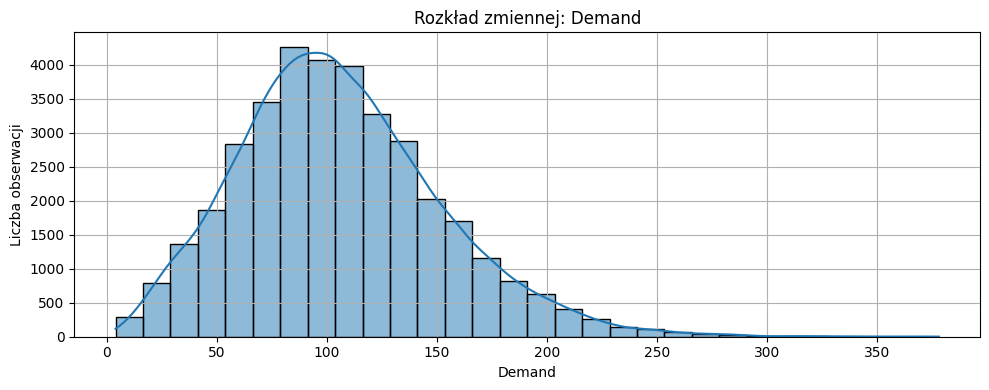

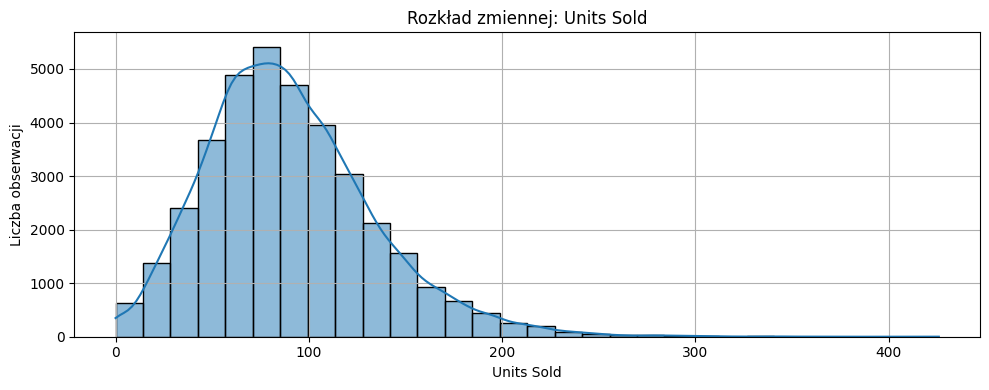

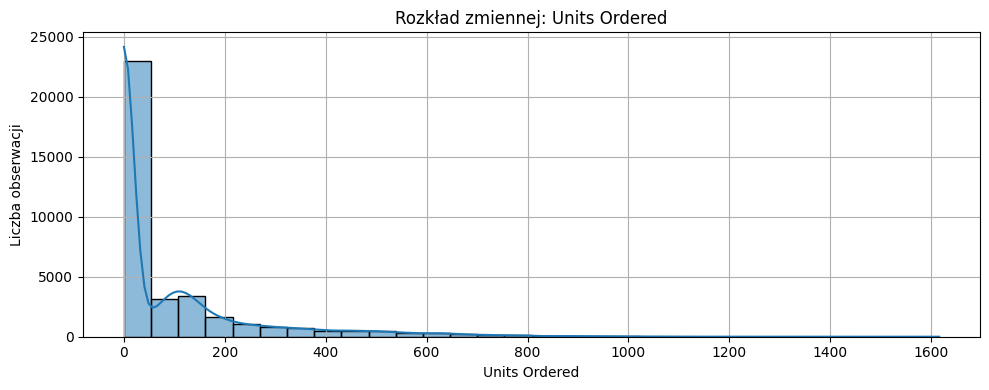

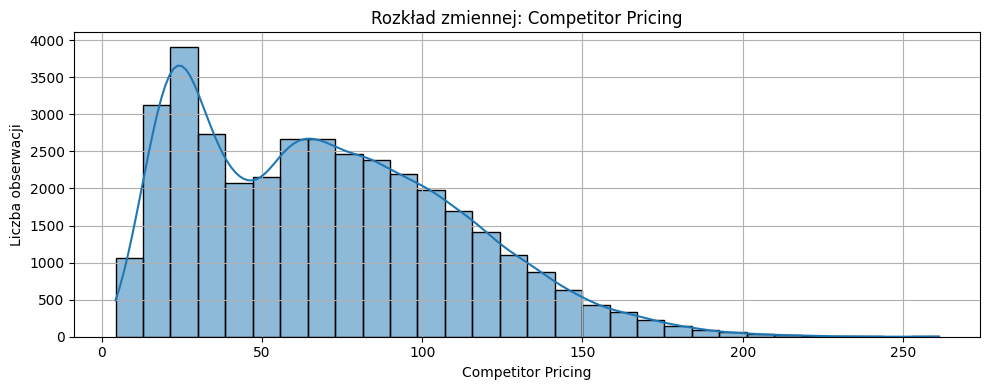

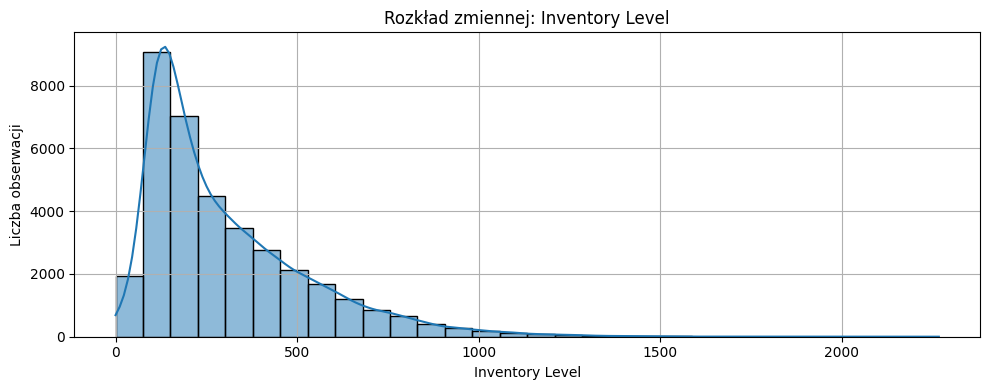

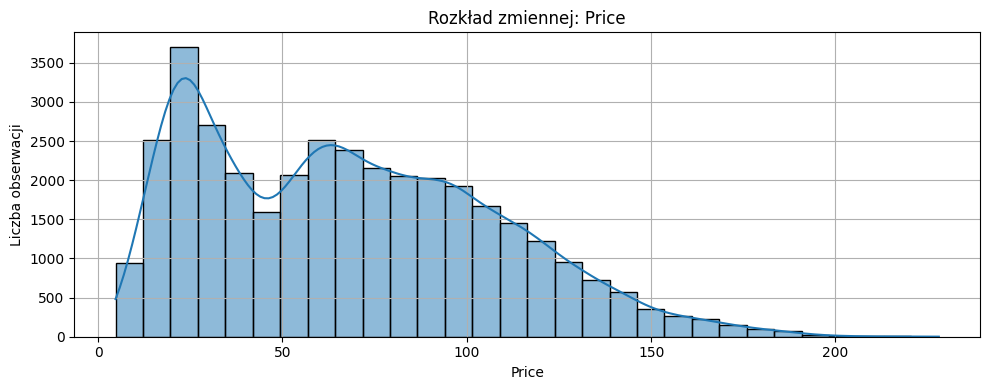

In [13]:
#Histogramy zmiennych numerycznych
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Rozkład zmiennej: {col}")
    plt.xlabel(col)
    plt.ylabel("Liczba obserwacji")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

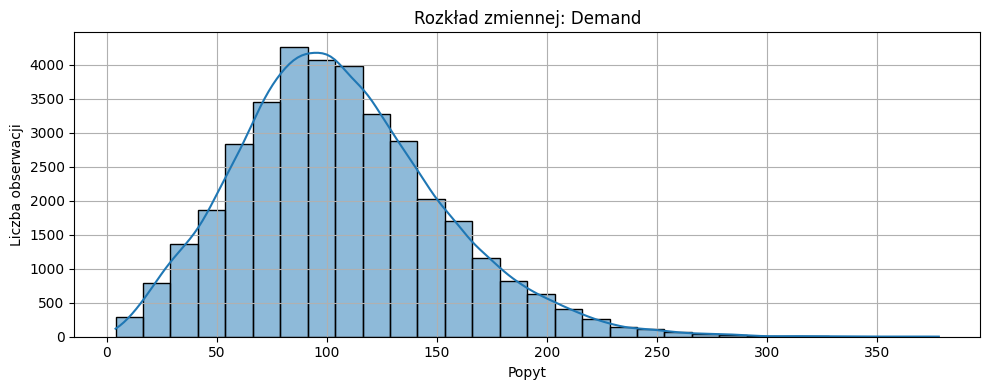

In [14]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Demand'], bins=30, kde=True)
plt.title("Rozkład zmiennej: Demand")
plt.xlabel('Popyt')
plt.ylabel("Liczba obserwacji")
plt.grid(True)
plt.tight_layout()
plt.show()

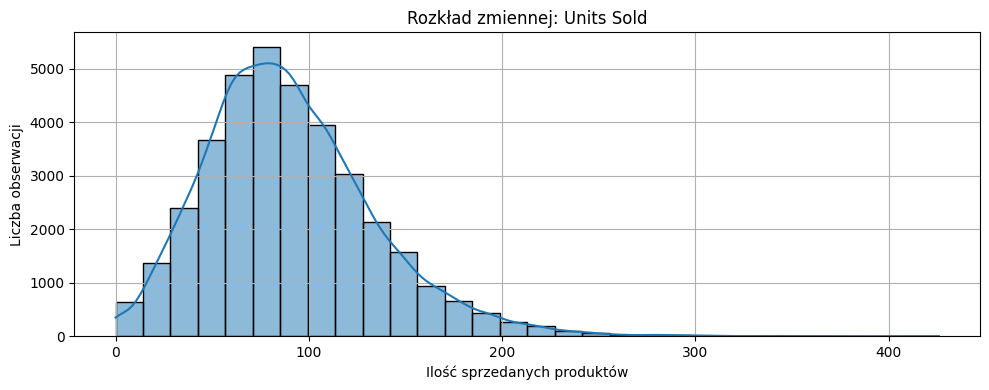

In [15]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.title("Rozkład zmiennej: Units Sold")
plt.xlabel('Ilość sprzedanych produktów')
plt.ylabel("Liczba obserwacji")
plt.grid(True)
plt.tight_layout()
plt.show()

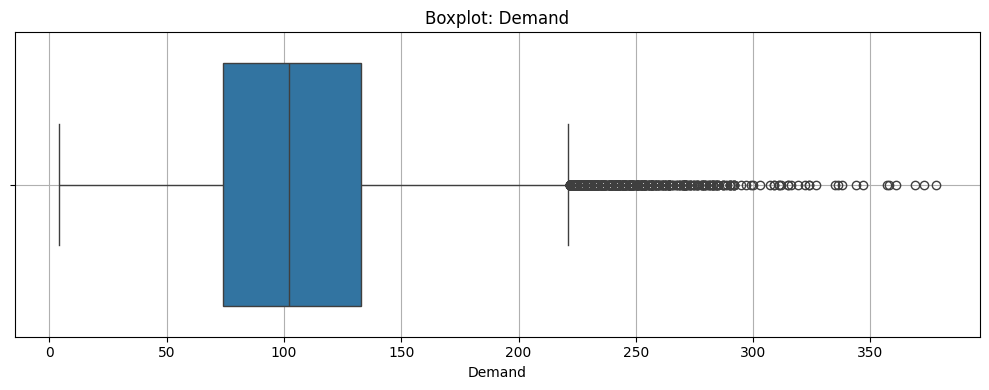

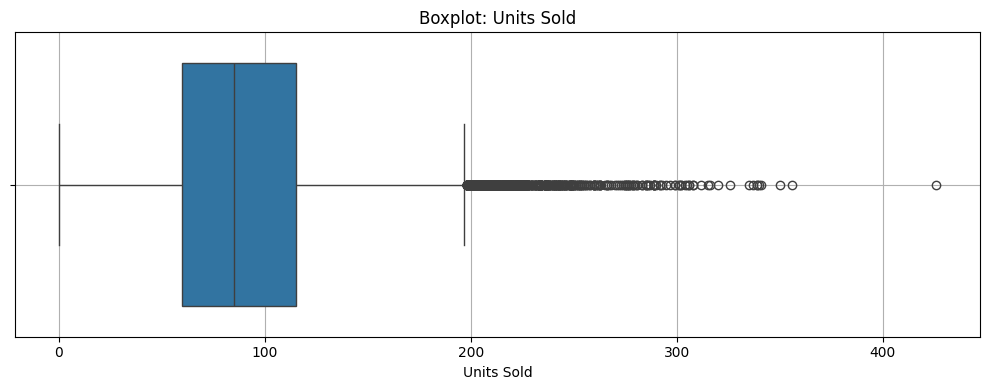

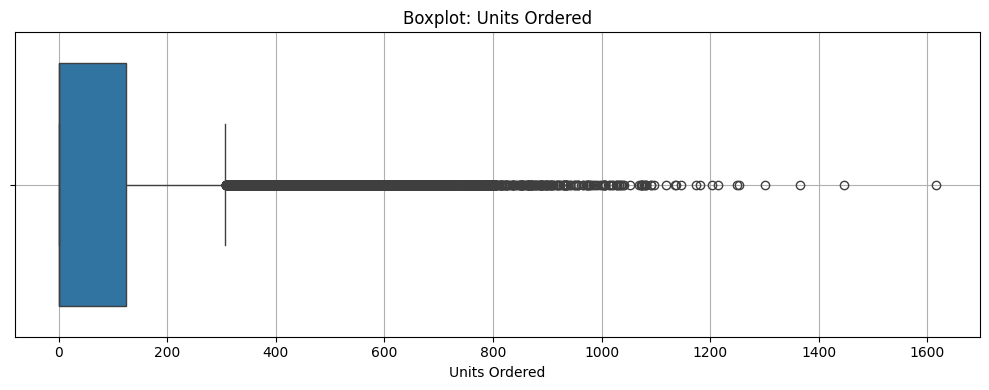

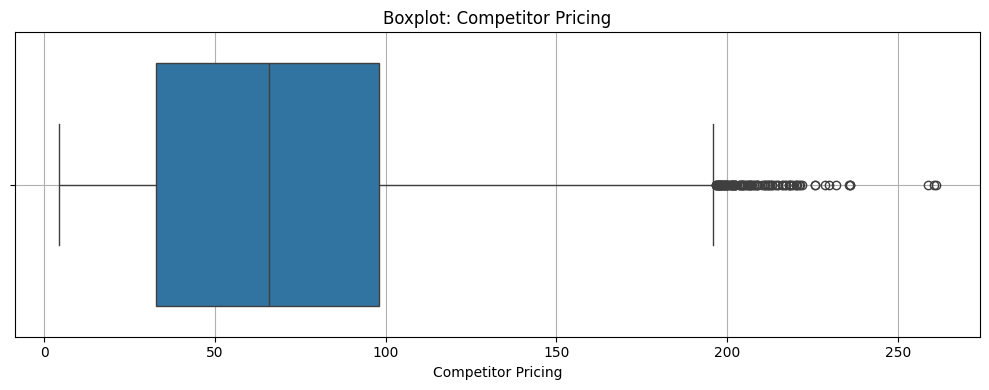

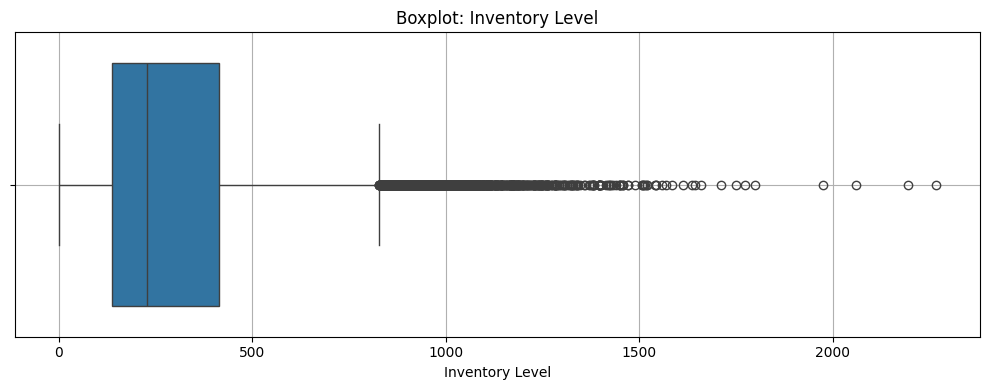

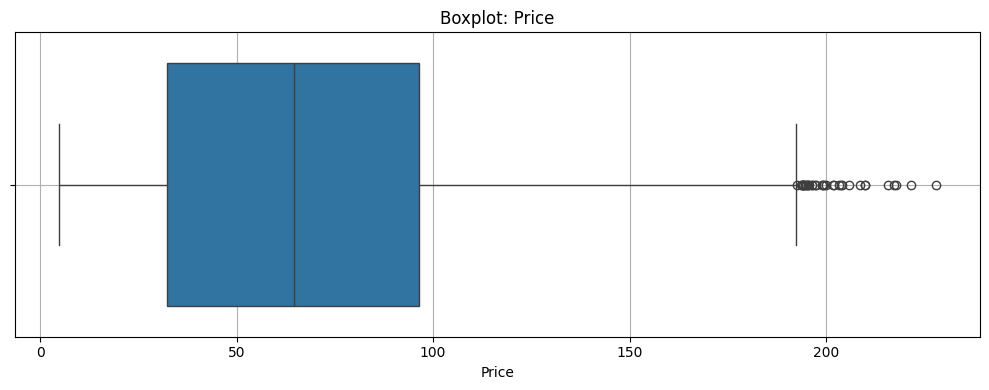

In [16]:
# Wykresy wąsate  
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

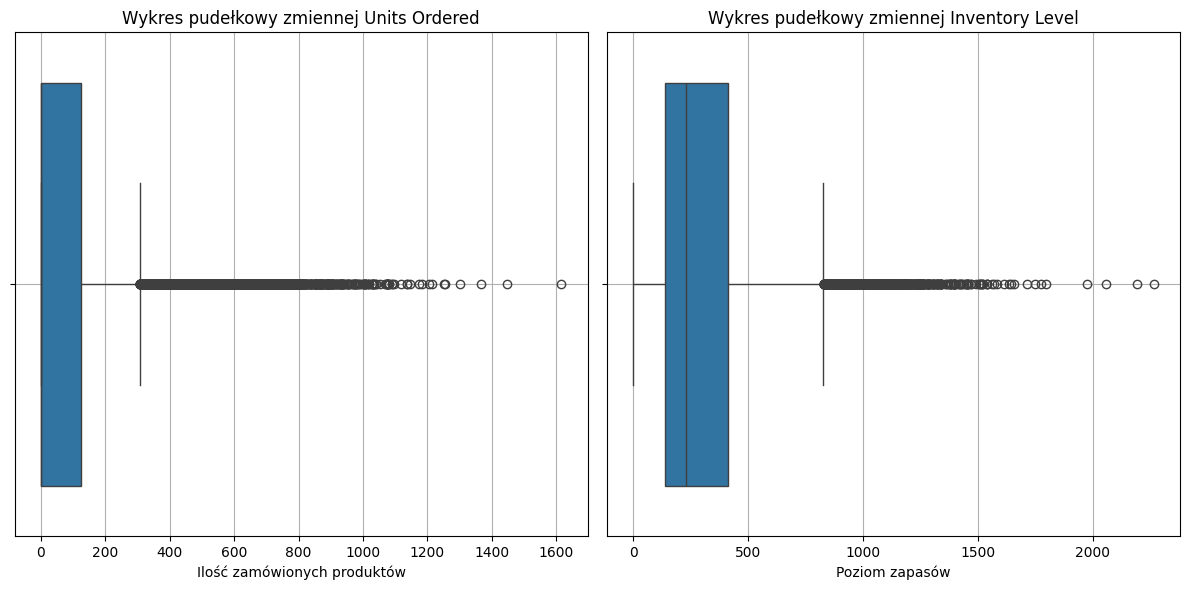

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.boxplot(x=df['Units Ordered'])
plt.title("Wykres pudełkowy zmiennej Units Ordered")
plt.xlabel('Ilość zamówionych produktów')
plt.grid(True)

plt.subplot(1,2,2)
sns.boxplot(x=df['Inventory Level'])
plt.title("Wykres pudełkowy zmiennej Inventory Level")
plt.xlabel('Poziom zapasów')
plt.grid(True)

plt.tight_layout()
plt.show()

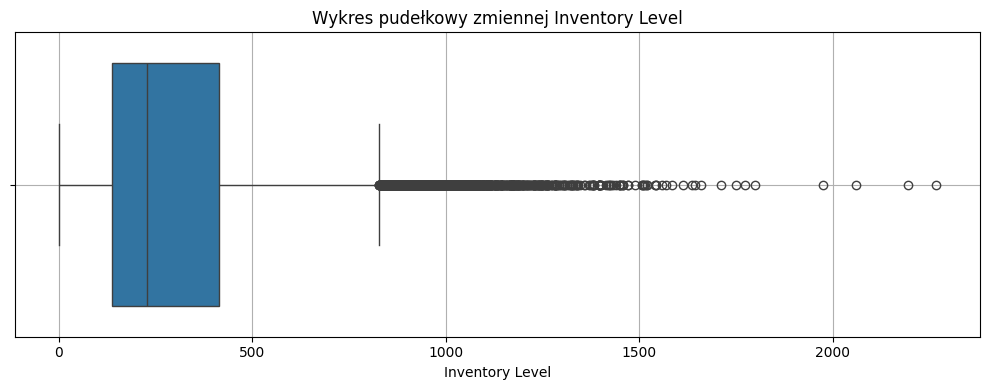

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Inventory Level'])
plt.title("Wykres pudełkowy zmiennej Inventory Level")
plt.grid(True)
plt.tight_layout()
plt.show()

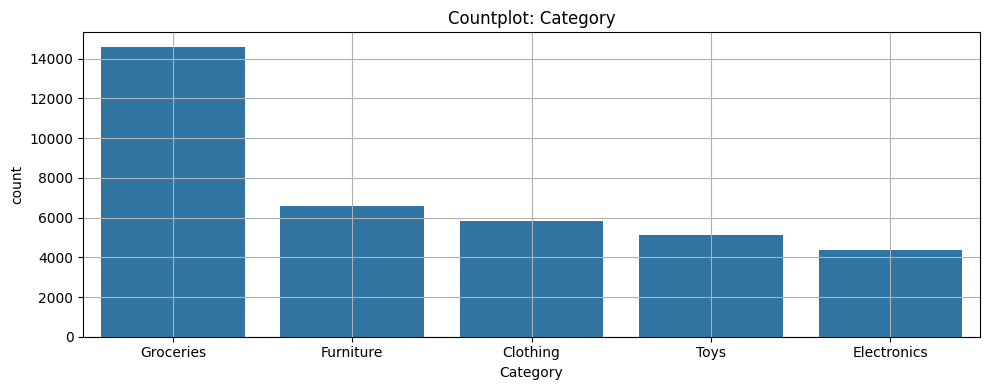

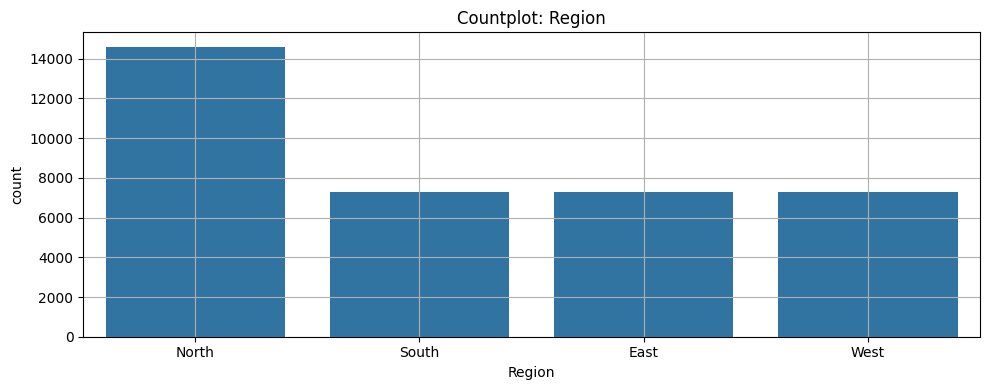

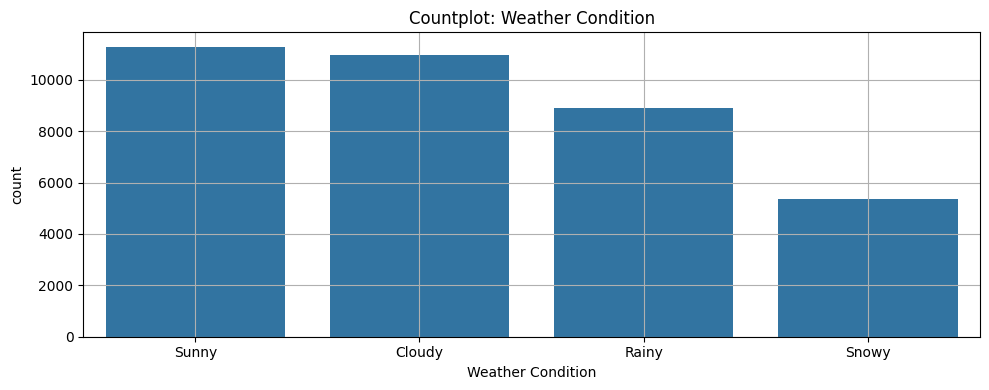

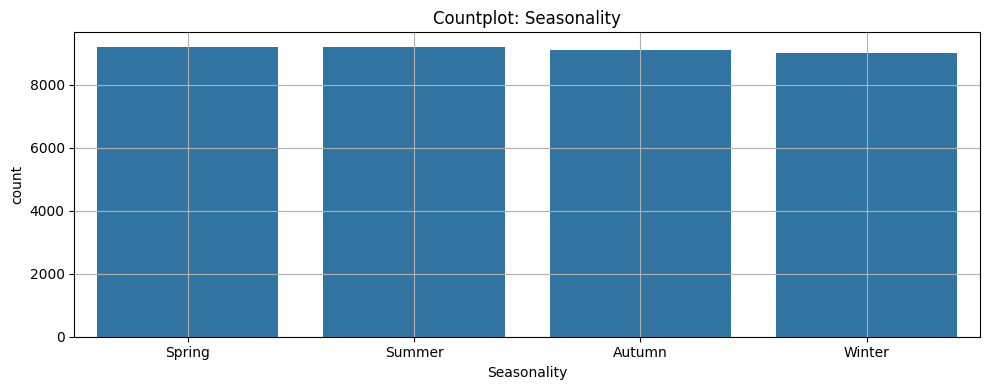

In [19]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Countplot: {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

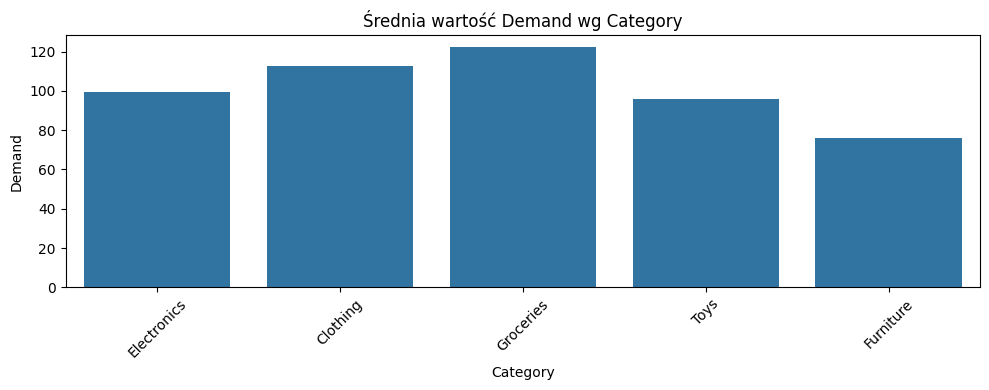

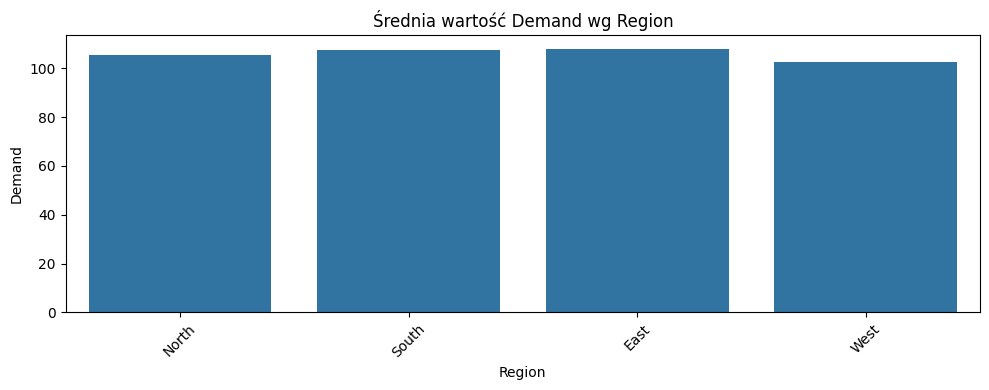

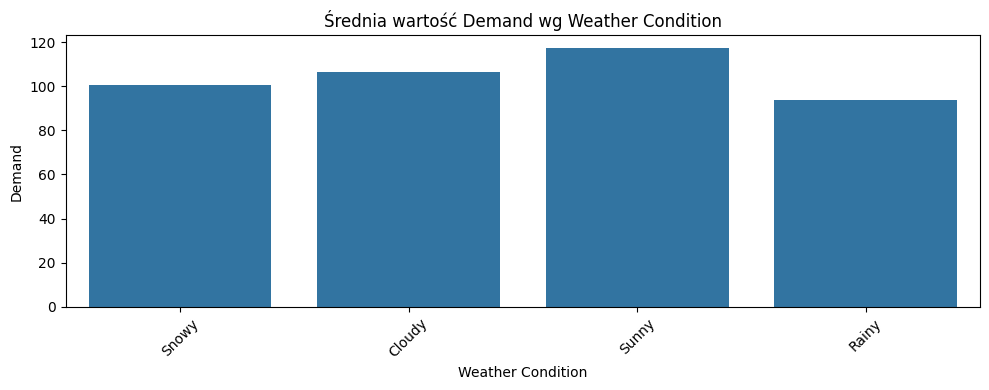

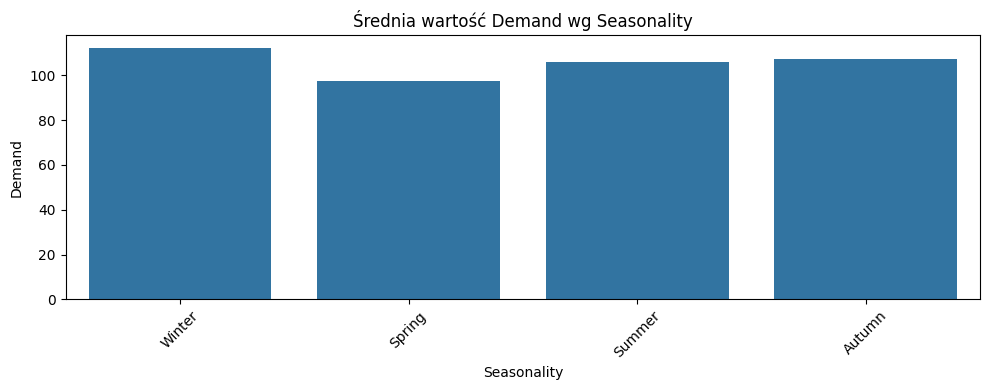

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=col, y='Demand', data=df, estimator='mean', errorbar=None)
    plt.title(f"Średnia wartość Demand wg {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

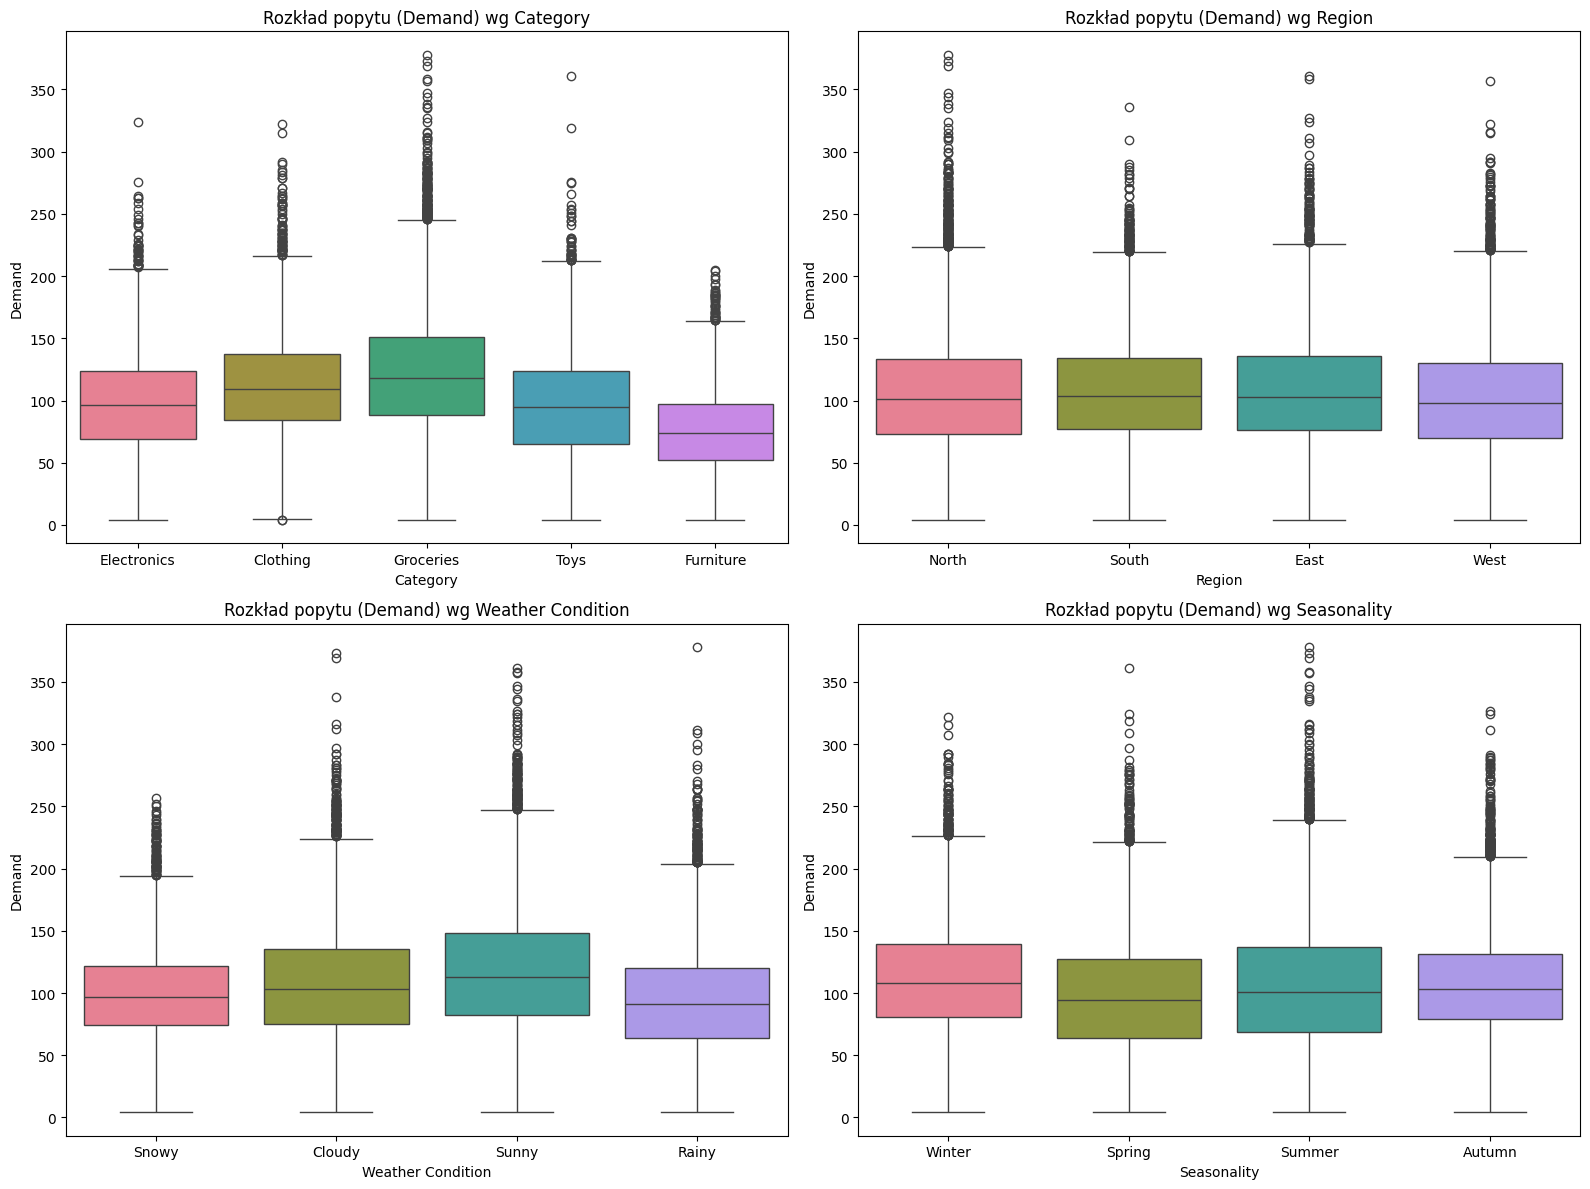

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.boxplot(x=feature, y='Demand', hue = feature, data=df, ax=axes[i], palette="husl")
    axes[i].set_title(f'Rozkład popytu (Demand) wg {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Demand')

plt.tight_layout()
plt.show()

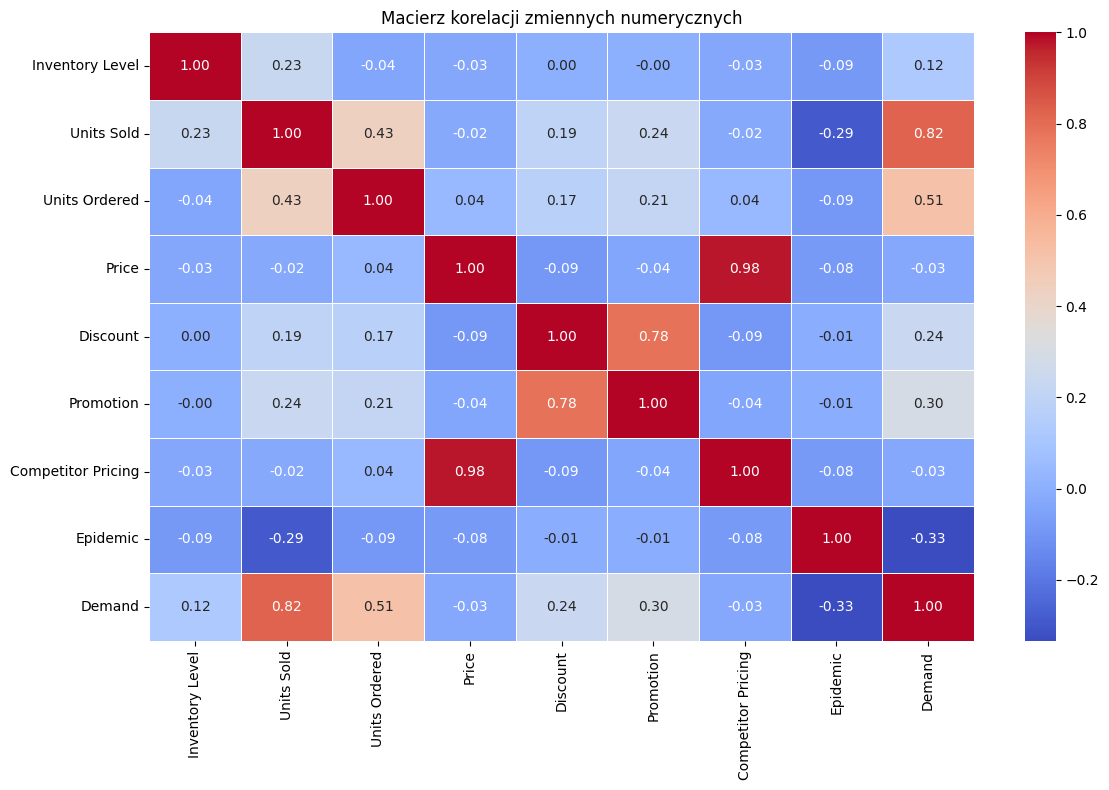

In [22]:
# Obliczenie macierzy korelacji
correlation_matrix = df.corr(numeric_only=True)

# Stworzenie wykresu korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji zmiennych numerycznych")
plt.tight_layout()
plt.show()

In [23]:
# Zapis przekształconego zbioru danych do pliku CSV
output_path = "/Users/piotrek/Documents/Repositories/Masters Project/sales-analysis/data/processed/sales_data_clean.csv"
df.to_csv(output_path, index=False)

In [24]:
selected_numeric_columns = ['Demand', 'Units Sold', 'Units Ordered', 'Inventory Level']

In [25]:
# Zastosowanie metody IQR (interquartile range) do identyfikacji obserwacji odstających
numeric_df = df[selected_numeric_columns]
outliers_summary = {}
outlier_indices = set()

for column in selected_numeric_columns:
    Q1 = np.percentile(numeric_df[column], 25)
    Q3 = np.percentile(numeric_df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    outliers_summary[column] = {
        "Liczba outliersów": outliers.shape[0],
        "Procent outliersów": round(100 * outliers.shape[0] / numeric_df.shape[0], 2),
        "Dolna granica": lower_bound,
        "Górna granica": upper_bound
    }
    outlier_indices.update(outliers.index)

outliers_df = pd.DataFrame(outliers_summary).T
outliers_df

,Liczba outliersów,Procent outliersów,Dolna granica,Górna granica
Demand,550.0,1.51,-14.5,221.5
Units Sold,723.0,1.98,-22.5,197.5
Units Ordered,3632.0,9.95,-184.5,307.5
Inventory Level,1261.0,3.45,-277.0,827.0


In [26]:
# #DELETE OUTLIERS
# df = df.drop(index=outlier_indices)
# df.shape

In [27]:
# Step 3: Encode categorical variables
# label_encoders = {}

# for col in categorical_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

In [28]:
# Drop columns not useful for prediction (ID columns and Date)
df = df.drop(columns=['Date', 'Store ID', 'Product ID'])

In [29]:
X = df.drop(columns=['Demand'])
y = df['Demand']

In [30]:
#Wersja czasowa
# split_index = int(len(df) * 0.8)
# X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
# y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [31]:
for col in categorical_cols:
    X[col] = X[col].astype('category')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 109220)

In [33]:
X_trainval, X_valid, y_trainval, y_valid = train_test_split(X_train, y_train, shuffle=True,  random_state=109220)

In [34]:
def objective(trial):
    param = {
        'tree_method': trial.suggest_categorical('tree_method', ['approx', 'hist']),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.1, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.3, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'random_state': 109220
            }
    model = xgb.XGBRegressor(**param, enable_categorical=True, objective="reg:squarederror")
    model.fit(X_trainval, y_trainval, eval_set=[(X_valid, y_valid)], verbose=False)
    
    predicted = model.predict(X_valid)
    score = r2_score(predicted, y_valid)
    return score

In [35]:
#Wersja minimalizowania RMSE
# def objective(trial):
#     param = {
#         'tree_method': trial.suggest_categorical('tree_method', ['approx', 'hist']),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'eta': trial.suggest_float('eta', 0.1, 1.0),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
#         'random_state': 109220
#             }
#     model = xgb.XGBRegressor(**param, enable_categorical=True, objective="reg:squarederror")
#     model.fit(X_trainval, y_trainval, eval_set=[(X_valid, y_valid)], verbose=False)
    
#     predicted = model.predict(X_valid)
#     score = root_mean_squared_error(predicted, y_valid)
#     return score

In [36]:
import optuna
# Create and run the optimization process with 100 trials
sampler = optuna.samplers.TPESampler(seed = 109220)
study = optuna.create_study(study_name="XGBoost zoptymalizowany", direction='maximize', sampler = sampler) 
study.optimize(objective, n_trials=30, show_progress_bar=True, timeout = 180)

[I 2026-01-12 16:42:00,024] A new study created in memory with name: XGBoost zoptymalizowany


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2026-01-12 16:42:02,050] Trial 0 finished with value: 0.8507353067398071 and parameters: {'tree_method': 'approx', 'max_depth': 5, 'eta': 0.11642386606322522, 'learning_rate': 0.1291339470803075, 'n_estimators': 698, 'subsample': 0.9067275567088903, 'colsample_bynode': 0.8774650118619014, 'min_child_weight': 147}. Best is trial 0 with value: 0.8507353067398071.
[I 2026-01-12 16:42:03,672] Trial 1 finished with value: 0.8490617871284485 and parameters: {'tree_method': 'approx', 'max_depth': 4, 'eta': 0.2922556322585995, 'learning_rate': 0.15435147703786883, 'n_estimators': 962, 'subsample': 0.9207566893033418, 'colsample_bynode': 0.6437747315074752, 'min_child_weight': 142}. Best is trial 0 with value: 0.8507353067398071.
[I 2026-01-12 16:42:04,740] Trial 2 finished with value: 0.84615159034729 and parameters: {'tree_method': 'approx', 'max_depth': 6, 'eta': 0.10187285060716039, 'learning_rate': 0.03946775786238885, 'n_estimators': 472, 'subsample': 0.849560045187551, 'colsample_byno

In [37]:
# Retrieve the best parameter values
best_params = study.best_params
print(f"\nBest parameters: {best_params}")


Best parameters: {'tree_method': 'approx', 'max_depth': 7, 'eta': 0.5730351762541079, 'learning_rate': 0.07331951371190376, 'n_estimators': 888, 'subsample': 0.8082968604863675, 'colsample_bynode': 0.4957387286831088, 'min_child_weight': 71}


In [38]:
import optuna.visualization as vis

display(vis.plot_param_importances(study))
display(vis.plot_optimization_history(study))

In [39]:
# Train the model with the best parameters
best_model = xgb.XGBRegressor(**study.best_params, enable_categorical=True)
best_model.fit(X_train, y_train)
# Predict the test data
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("MSE train:", mse_train)
print("MSE test:", mse_test)
print("RMSE train:", rmse_train)
print("RMSE test:", rmse_test)
print("R² train:", r2_train)
print("R² test:", r2_test)

MSE train: 161.17529296875
MSE test: 269.0367736816406
RMSE train: 12.695483207702637
RMSE test: 16.402339935302734
R² train: 0.9250537157058716
R² test: 0.8708218336105347


In [40]:
print(f'Best model result in Test: {r2_score(y_test, best_model.predict(X_test))}')
print(f'Best model result in Train: {r2_score(y_train, best_model.predict(X_train))}')

Best model result in Test: 0.8708218336105347
Best model result in Train: 0.9250537157058716


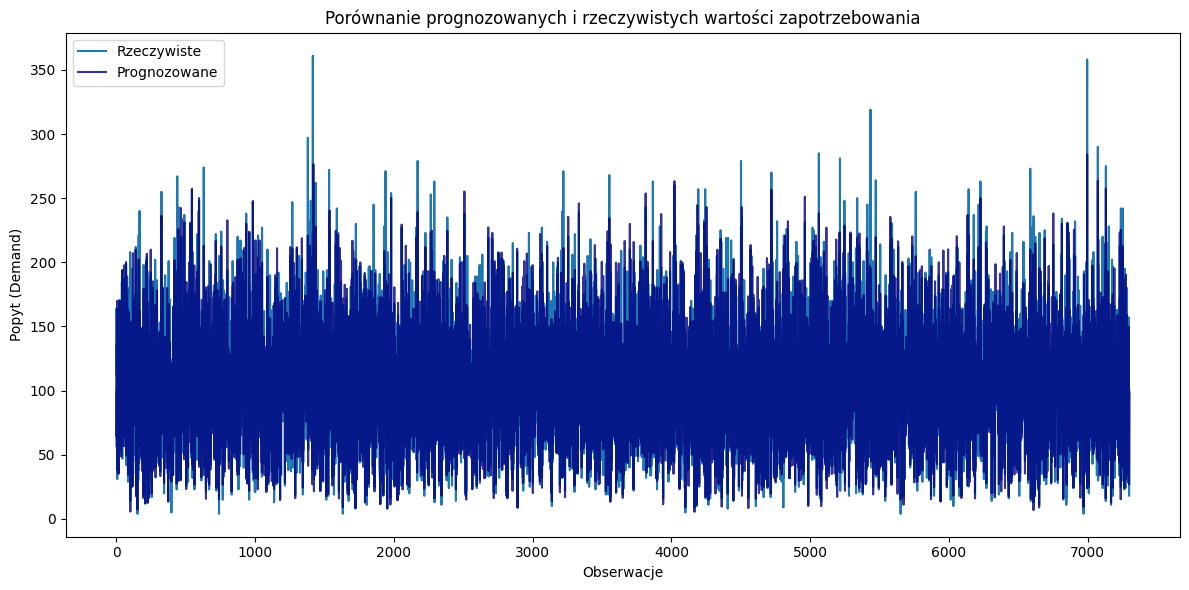

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Rzeczywiste')
plt.plot(y_pred_test, color ='navy', label='Prognozowane', alpha=0.8)
plt.title("Porównanie prognozowanych i rzeczywistych wartości zapotrzebowania")
plt.xlabel("Obserwacje")
plt.ylabel("Popyt (Demand)")
plt.legend()
plt.tight_layout()
plt.show()

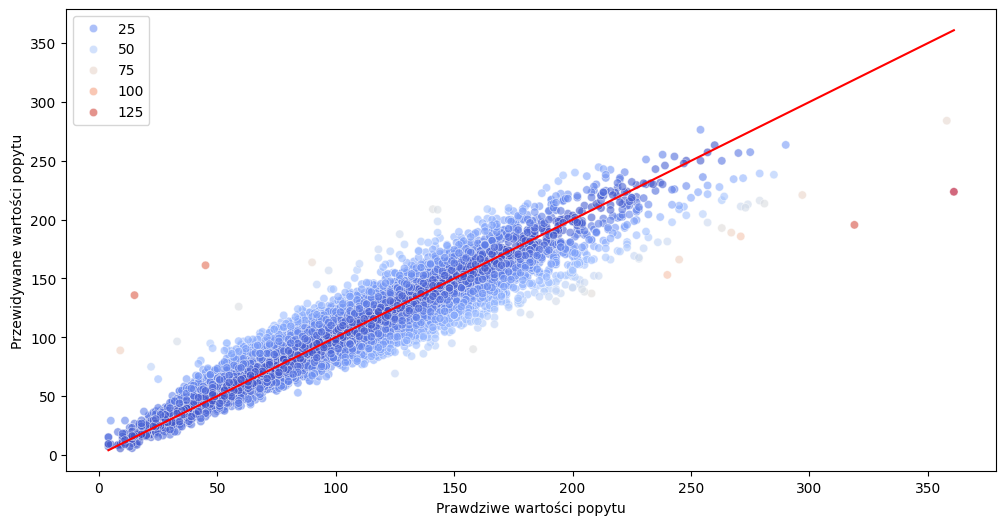

In [42]:
residuals = abs(y_test - y_pred_test)
plt.figure(figsize=(12,6))
sns.scatterplot(x = y_test, y = y_pred_test, hue=residuals, palette='coolwarm', alpha = 0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
plt.ylabel('Przewidywane wartości popytu')
plt.xlabel('Prawdziwe wartości popytu')
plt.show()

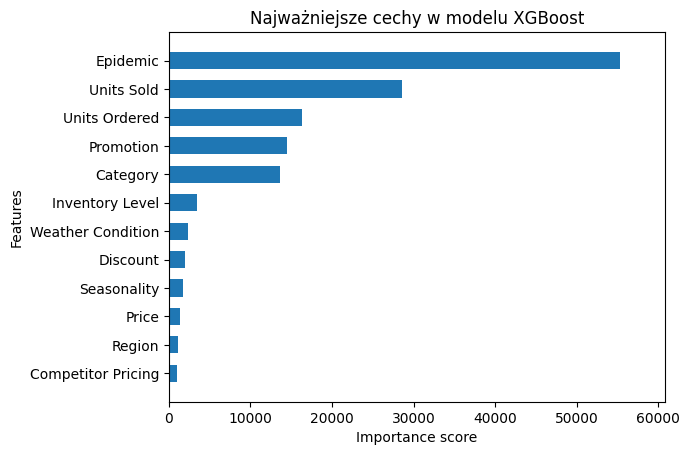

In [43]:
xgb.plot_importance(best_model, importance_type='gain', show_values = False, grid = False, height=0.6)
plt.title("Najważniejsze cechy w modelu XGBoost")
plt.show()

In [44]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

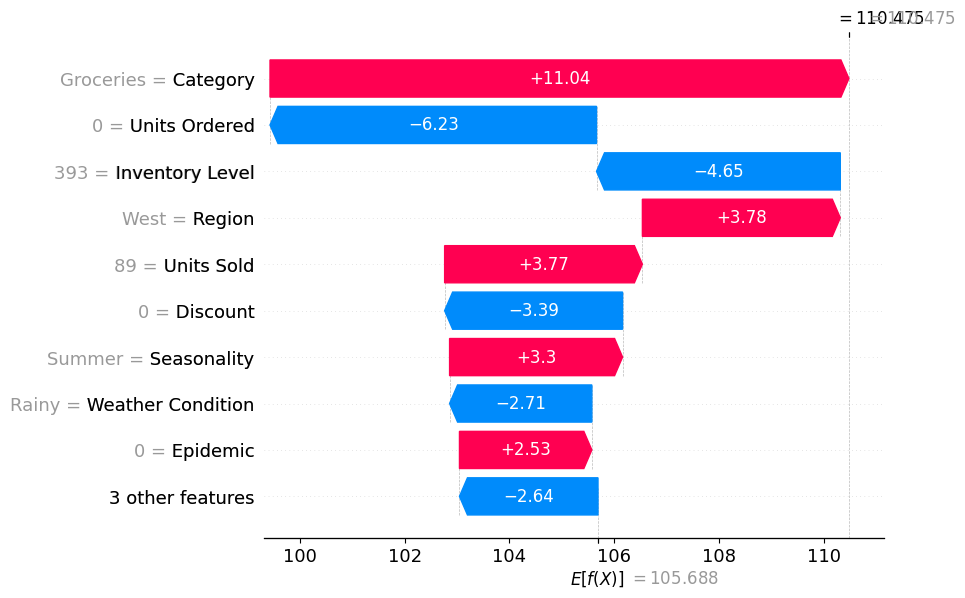

In [45]:
#Dla 1 obserwacji przykład
shap.plots.waterfall(shap_values[50])

In [46]:
# shap.plots.force(shap_values[0:7300])

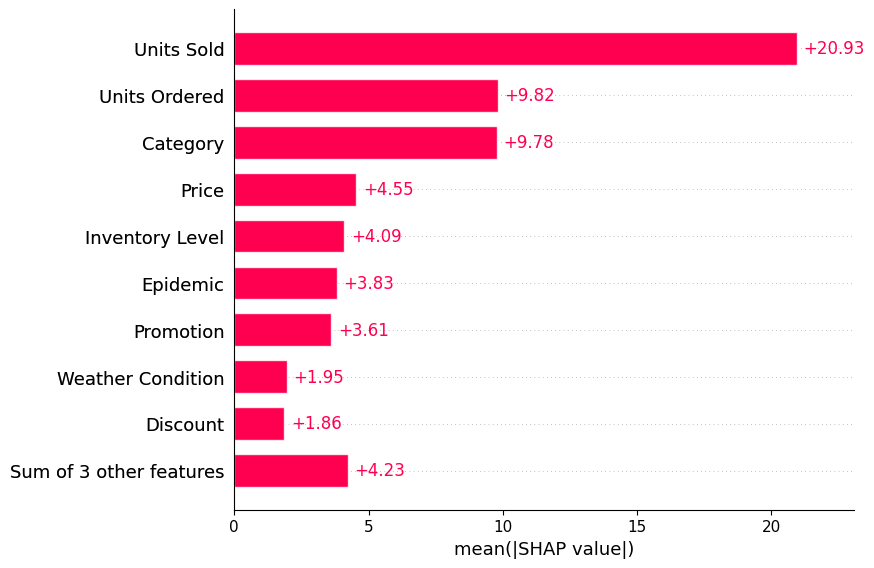

In [47]:
shap.plots.bar(shap_values)

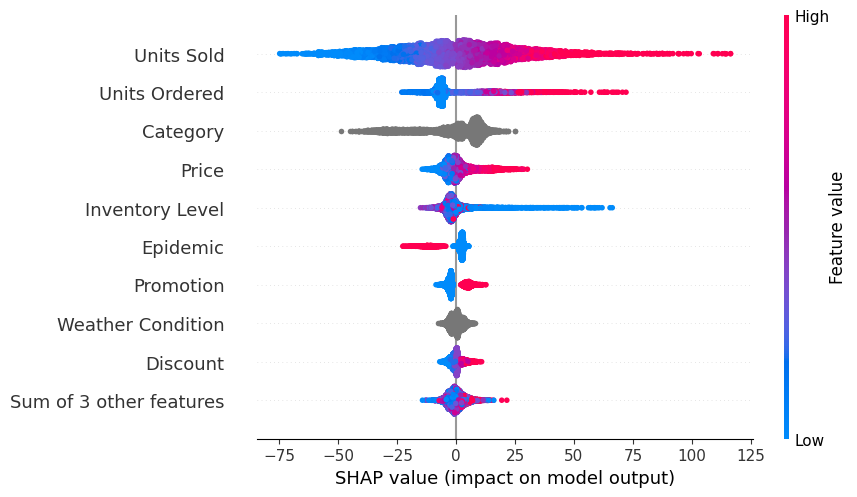

In [48]:
shap.plots.beeswarm(shap_values)

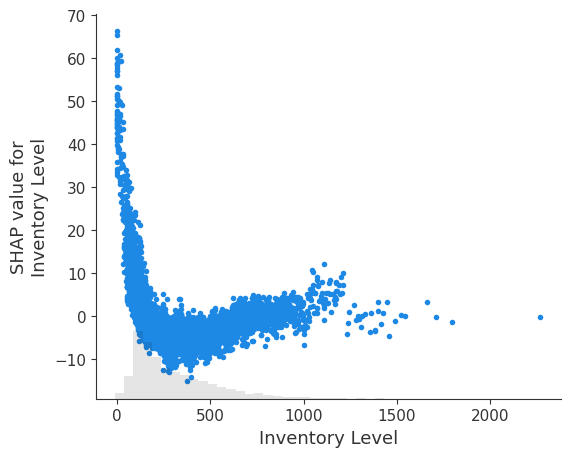

In [49]:
shap.plots.scatter(shap_values[:,'Inventory Level'])